<a href="https://colab.research.google.com/github/MiquelMolinier/Proyecto_SI/blob/master/Proyecto2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Módulos
import numpy as np
from matplotlib import pyplot as plt
from functools import reduce

In [2]:
#! /usr/bin/env python
# -*- coding: utf-8 -*-
#
# Librería 'fuzzy.py', para aplicaciones de lógica difusa.
# Versión 1.1 - Sólo para uso educativo
# Autor: Claudio Morales Díaz 
# Santiago, Chile, 2020.
# 

#
# Función singleton(x, x0): función de pertenencia singleton.
# Argumentos:
#   x: int, float, numpy.ndarray
#      Contiene los valores de x en el universo de discurso
#      para los cuales se evalúa su valor de pertenencia.
#   x0: valor de referencia.
# Retorna:
#   singleton(x, x0): float, si x es int, float.
#   singleton(x, x0): numpy.ndarray: si x es numpy.ndarray
#   -1 si no es posible calcular el valor
#
def singleton(x, x0):
    if (type(x) is int) or (type(x) is float) or (type(x) is np.float64):
    # Si X es entero o real evalua para el valor entrante.
        if x == x0:
            m = 1.0
        else:
            m = 0.0
        return m
    elif (type(x) is numpy.ndarray):
    # Si es un arreglo, evalua para todos sus elementos.
        m = np.zeros(x.size)
        for i in range(x.size):
            if x[i] == x0:
                m[i] = 1.0
            else:
                m[i] = 0.0
        return m
    else:
        return -1

# Función trimf(x, param): función de pertenencia triangular.
# Argumentos:
#   x: int, float, numpy.ndarray
#      Contiene los valores de x en el universo de discurso
#      para los cuales se evalúa su valor de pertenencia.
#   param = [a, b, c]: list, numpy.ndarray
#      contiene los parámetros de la función de pertenencia
#      debe cumplirse a <= b <= c
# Retorna:
#   valor de pertencia de x según función de membresía triangular.
#   trimf(x, param): float, si x es int, float.
#   trimf(x, param): numpy.ndarray: si x es numpy.ndarray
#   -1 si no es posible calcular el valor
#
def trimf(x, param):
    # param = [a, b, c]
    # a <= b <= c
    a = float(param[0])
    b = float(param[1])
    c = float(param[2])
    if (a <= b) and (b <= c):
        if (type(x) is int) or (type(x) is float) or (type(x) is np.float64):     
            if x <= a:
                m = 0.0
            elif (a <= x) and (x <= b):
                m = (x - a)/(b - a)   
            elif (b <= x) and (x <= c):
                m = (c - x)/(c - b)  
            else:
                m = 0.0
            if x == a and a == b:
              m = 1.0
            if x == b and b == c:
              m = 1.0
            return m
        else: 
            m = np.zeros(x.size)
            for i in range(x.size):
              if x[i] <= a:
                  m[i] = 0.0
              elif (a <= x[i]) and (x[i] <= b):
                  m[i] = (x[i] - a)/(b - a)   
              elif (b <= x[i]) and (x[i] <= c):
                  m[i] = (c - x[i])/(c - b)  
              else:
                  m[i] = 0.0
              if x[i] == a and a == b:
                m[i] = 1.0
              if x[i] == b and b == c:
                m[i] = 1.0
        return m
    else:
        return -1


# Función trapmf(x, [a, b, c, d]): función de pertenencia trapezoidal.
# Argumentos:
#   x: int, float, numpy.ndarray
#      Contiene los valores de x en el universo de discurso
#      para los cuales se evalúa su valor de pertenencia.
#   [a, b, c, d]: list, numpy.ndarray
#      contiene los parámetros de la función de pertenencia
#      debe cumplirse a <= b <= c <= d
# Retorna:
#   valor de pertencia de x según función de membresía triangular.
#   trapmf(x, param): float, si x es int, float.
#   trapmf(x, param): numpy.ndarray: si x es numpy.ndarray
#   -1 si no es posible calcular el valor
#
def trapmf(x, param):
    # param = [a, b, c, d]
    # a <= b <= c <=d
    a = float(param[0])
    b = float(param[1])
    c = float(param[2])
    d = float(param[3])
    if (a <= b) and (b <= c) and (c <= d):
        if (type(x) is int) or (type(x) is float) or (type(x) is np.float64):    
            if x <= a:
              m = 0.0
            elif (a <= x) and (x <= b):
              m = (x - a)/(b - a)   
            elif (b <= x) and (x <= c):
              m = 1.0  
            elif (c <= x) and (x <= d):
              m = (d - x)/(d - c)  
            else:
                m = 0.0
            if x == a and a == b:
              m = 1.0
            if x == c and c == d:
              m = 1.0 
            return m
        else: 
            m = np.zeros(x.size)
            for i in range(x.size):
              if x[i] <= a:
                m[i] = 0.0
              elif (a <= x[i]) and (x[i] <= b):
                m[i] = (x[i] - a)/(b - a)   
              elif (b <= x[i]) and (x[i] <= c):
                m[i] = 1.0
              elif (c <= x[i]) and (x[i] <= d):
                m[i] = (d - x[i])/(d - c)  
              else:
                m[i] = 0.0
              if x[i] == a and a == b:
                m[i] = 1.0
              if x[i] == c and c == d:
                m[i] = 1.0
            return m
    else:
        return -1

#
# Función gaussmf(x, param): función de pertenencia gaussiana.
# Argumentos:
#   x: int, float, numpy.ndarray
#      Contiene los valores de x en el universo de discurso
#      para los cuales se evalúa su valor de pertenencia.
#   param = [sig, x0]: list, numpy.ndarray
#      contiene los parámetros de la función de pertenencia
#      debe cumplirse sig > 0
# Retorna:
#   valor de pertencia de x según función de membresía triangular.
#   gaussmf(x, param): float, si x es int, float.
#   gaussmf(x, param): numpy.ndarray: si x es numpy.ndarray
#   -1 si no es posible calcular el valor
#
def gaussmf(x, param):
    #param = [sig, x0]
    # sig > 0
    sig = param[0]
    x0 = param[1]
    if (sig > 0):
        if (type(x) is int) or (type(x) is float) or (type(x) is np.float64):     
            m = np.exp(-0.5*((x - x0)/sig)**2)
        else: 
            m = np.zeros(x.size)
            for i in range(x.size):
                m[i] = np.exp(-0.5*((x[i] - x0)/sig)**2)
        return m
    else:
        return -1

#
# Función gbellmf(x, param): función de pertenencia campana generalizada.
#   x: int, float, numpy.ndarray
#      Contiene los valores de x en el universo de discurso
#      para los cuales se evalúa su valor de pertenencia.
#   param = [a, b, x0]: list, numpy.ndarray
#      contiene los parámetros de la función de pertenencia
#      debe cumplirse a, b > 0
# Retorna:
#   valor de pertencia de x según función de membresía triangular.
#   gbellmf(x, param): float, si x es int, float.
#   gbellmf(x, param): numpy.ndarray: si x es numpy.ndarray
#   -1 si no es posible calcular el valor
#
def gbellmf(x, param):
    # param = [a, b, x0]
    # a, b > 0
    a = param[0]
    b = param[1]
    x0 = param[2]
    if (a > 0) and (b > 0):
        if (type(x) is int) or (type(x) is float):     
            m = 1/(1+(abs((x - x0)/a)**(2*b)))
        else: 
            m = np.zeros(x.size)
            for i in range(x.size):
                m[i] = 1/(1+(abs((x[i] - x0)/a)**(2*b)))
        return m
    else:
        return -1

#
# Función sigmf(): función de pertenencia sigmoidal.
#   x: int, float, numpy.ndarray
#      Contiene los valores de x en el universo de discurso
#      para los cuales se evalúa su valor de pertenencia.
#   param = [a, x0]: list, numpy.ndarray
#      contiene los parámetros de la función de pertenencia
# Retorna:
#   valor de pertencia de x según función de membresía triangular.
#   sigmf(x, param): numpy.float, si x es int, float.
#   sigmf(x, param): numpy.ndarray: si x es numpy.ndarray
#   -1 si no es posible calcular el valor
#
def sigmf(x, param):
    # param = [a, x0]
    a = param[0]
    x0 = param[1]
    if (type(x) is int) or (type(x) is float) or (type(x) is np.float64):    
        m = 1/(1+np.exp(-a*(x - x0)))
    else: 
        m = np.zeros(x.size)
        for i in range(x.size):
            m[i] = 1/(1+np.exp(-a*(x[i] - x0)))
    return m

#
# Función Tmin(): Norma T
# Argumentos:
#   mA: numpy.ndarray, Vector con valores de pertenencia de xA
#   mB: numpy.ndarray, Vector con valores de pertenencia de xB
# Retorna:
#   Tmin: Norma T (mínimo)
#
def Tmin(mA, mB):
    Tmin = np.zeros([mA.size])
    for i in range(mA.size):
        Tmin[i] = min(mA[i], mB[i])
    return Tmin

#
# Funcion T_probabilistico(): Norma T
# Argumentos:
# A1 (*) A2 (*) A3 (*) A4 (*) ... (*) AN
# Donde (*) es el operador T-norma
# Y Ai son números o vectores
# Retorna:
# ret = Norma T (probabilístico)
#

def T_probabilistico(*args):
  t_norma = (lambda x,y: x * y)
  if all(map(isinstance,args,[(int,float,np.float64,np.ndarray)]*len(args))):
    return reduce(t_norma,args)
  return None

#
# Función Smax(): Norma S
# Argumentos:
#   mA: numpy.ndarray, Vector con valores de pertenencia de xA
#   mB: numpy.ndarray, Vector con valores de pertenencia de xB
# Retorna:
#   Tmin: Norma S (máximo)
#
def Smax(mA, mB):
    Smax = np.zeros([mA.size])
    for i in range(mA.size):
        Smax[i] = max(mA[i], mB[i])
    return Smax

#
# Función S_probabilístico(): Norma S
# Argumentos:
#   A1 (+) A2 (+) A3 (+) A4 (+) ... (+) AN
# Donde (+) es el operador S-norma y Ai son números o vectores
# Retorna:
#   Norma S (Probabilístico)
#
def S_probabilistico(*args):
    s_norma = (lambda x,y: (x + y) - (x * y))
    if all(map(isinstance,args,[(int,float,np.float64,np.ndarray)]*len(args))):
      return reduce(s_norma, args)
    return None

#
# Función Nc(): Complemento
# Argumentos:
#   mA: numpy.ndarray, Vector con valores de pertenencia de xA
# Retorna:
#   Nc: Complemento
#
def Nc(mA):
    Nc = np.zeros([mA.size])
    for i in range(mA.size):
        Nc[i] = 1 - mA[i]
    return Nc

#
# Función cut(): cortar
# Argumentos:
#   mf: numpy.ndarray
#   value: Int, Float, valor de corte
# Retorna:
#   numpy.ndarray: función cortada
#
def cut(value, mf):
    value = float(value)
    aux = np.zeros(mf.size)
    if (type(value) is int) or (type(value) is float):
        for i in range(mf.size):
            aux[i] = min(value, mf[i])
        return aux
    else:
        return -1

#
# Función union(): Unión de funciones de membresía por método max
# Argumentos:
#   data: arreglo de elementos numpy.ndarray, todos de igual dimensión
# Retorna:
#   numpy.ndarray: unión de las funciones
#
def union(data):
    aux = np.zeros(data[0].size)
    for j in range(len(data)):
        for i in range(aux.size):
            aux[i] = max(aux[i], data[j][i])
    return aux


#
# Función fuzz(): fuzzificación
# Argumentos:
#   x0: Int, Float, valor de entrada
#   y: numpy.ndarray, universo de discurso de salida
#   mA_list: arreglo de reglas de entrada
#   mB_list: arreglo de reglas de salida
# Retorna:
#   numpy.ndarray
def fuzz(x0, y, mA_list, mB_list):
    A0 = np.zeros(len(mA_list))
    Bi = np.zeros([y.size, len(mA_list)])
    out = np.zeros(y.size)
    for i in range(len(mA_list)):
        fA = mA_list[i][0]
        param_A = mA_list[i][1]
        A0[i] = fA(float(x0), param_A)
        fB = mB_list[i][0]
        param_B = mB_list[i][1]
        for j in range(y.size):
            Bi[j,i] = min(A0[i], fB(float(y[j]), param_B))
            out[j] = max(Bi[j,:])
    return(out)

#
# Función defuzz(): Defuzzificación
# Argumentos:
#   y: numpy.ndarray, universo de discurso de salida
#   mf: función resultante del proceso de fuzzificación
#   option: String, método de defuzzificación
# Retorna:
#   Float: valor de salida
def defuzz(y, mf, option):
    if option == 'centroid':
        num = 0
        den = 0
        for i in range(y.size-1):
            num = num + y[i]*mf[i]
            den = den + mf[i]
        y0 = num/den
        return y0
    
    elif option == 'bisector':
        area = 0
        aux = 0
        for i in range(y.size - 1):
            area = area + (y[i+1] - y[i]) * ((mf[i+1] + mf[i])/2)
        for i in range(y.size):
            aux = aux + (y[i+1] - y[i]) * ((mf[i+1] + mf[i])/2)
            if (aux >= area/2):
                return y[i]
        
    elif option == 'MOM':
        mf_max = max(mf)
        acum = 0
        n = 0
        for i in range(y.size):
            if (mf[i] == mf_max):
                acum = acum + y[i]
                n = n + 1
        return acum/n

    elif option == 'SOM':
        mf_max = max(mf)
        for i in range(y.size):
            if (mf[i] == mf_max):
                return y[i]
        
    elif option == 'LOM':
        mf_max = max(mf)
        for i in range(y.size):
            if (mf[y.size - i -1] == mf_max):
                return y[y.size - i -1]
            
    else:
        return -1


# PRIMER SISTEMA DIFUSO FACTOR FÍSICO

------------***Definición de variables de entrada***------------

**Grupo etario**

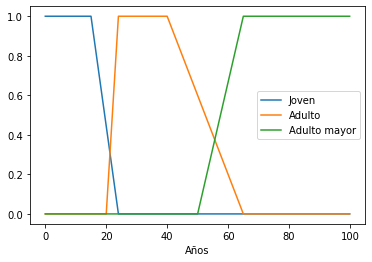

In [3]:
edad = np.arange(0,100,0.1)
edad_labele = ["EJ","EA","EAM"]
EJ = trapmf(edad, (0,0,15,24))
EA = trapmf(edad, (20,24,40,65))
EAM = trapmf(edad, (50,65,100,100))
plt.plot(edad,EJ,label="Joven")
plt.plot(edad,EA,label="Adulto")
plt.plot(edad,EAM,label="Adulto mayor")
plt.xlabel("Años")
plt.legend(loc="best")
plt.show()

**Índice de masa corporal**

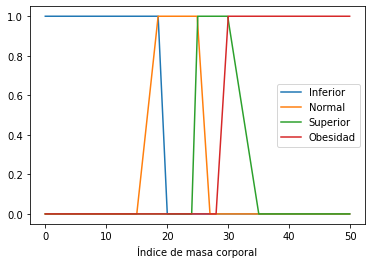

In [4]:
imc = np.arange(0,50,0.1)
imc_labeli = ["IMCI","IMCN","IMCS","IMCO"]
IMCI = trapmf(imc,(0,0,18.5,20))
IMCN = trapmf(imc,(15,18.5,24.9,27))
IMCS = trapmf(imc,(24,25,29.9,35))
IMCO = trapmf(imc,(28,30,50,50))

plt.plot(imc,IMCI,label="Inferior")
plt.plot(imc,IMCN,label="Normal")
plt.plot(imc,IMCS,label="Superior")
plt.plot(imc,IMCO,label="Obesidad")
plt.xlabel("Índice de masa corporal")
plt.legend(loc="best")
plt.show()

------------***Definición de la variable de salida***------------

**Factor físico**

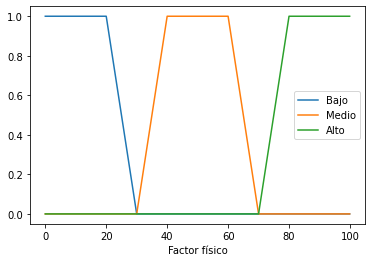

In [5]:
ff = np.arange(0,100,0.1)

FFB = trapmf(ff,(0,0,20,30))
FFM = trapmf(ff,(30,40,60,70))
FFA = trapmf(ff,(70,80,100,100))

plt.plot(ff,FFB,label="Bajo")
plt.plot(ff,FFM,label="Medio")
plt.plot(ff,FFA,label="Alto")
plt.xlabel("Factor físico")
plt.legend(loc="best")
plt.show()

------------***Definición de reglas***------------

In [6]:
rules_FIS1 = {
    ("EJ","IMCI"):"A",
    ("EJ","IMCN"):"B",
    ("EJ","IMCS"):"M",
    ("EJ","IMCO"):"A",
    ("EA","IMCI"):"A",
    ("EA","IMCN"):"B",
    ("EA","IMCS"):"M",
    ("EA","IMCO"):"A",
    ("EAM","IMCI"):"A",
    ("EAM","IMCN"):"M",
    ("EAM","IMCS"):"A",
    ("EAM","IMCO"):"A",
}

------------***Fuzzificación***------------

Teniendo en cuenta la fórmula de un regla if_then:
$\mu_{B^l}(y) = sup_{x{\in}U}\{\mu_{A \rightarrow B}(x,y)*\mu_{A'}(x)\}$ Con la regla singleton se tiene que $\mu_{B^l}(y) =\mu_{A \rightarrow B}(x,y)$ Donde x es el valor de entrada. 

$\mu_{B^l} = \mu_{A}(x)*\mu_{B}(y)$
y los antecedentes de las reglas son conjunciones $\mu_{A}(x) = \prod_{i=1}^{n}\mu_{A^i}(x_i) $.Así que se tiene que hallar los valores de inclusión de las entradas en los respectivos conjuntos difusos y multiplicarlos.

{'EJ': 0.3333333333333333, 'EA': 0.25, 'EAM': 0.0}


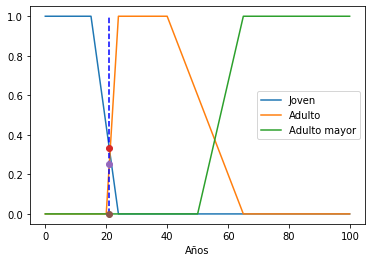

In [7]:
val_edad = 21

val_EJ = trapmf(val_edad, (0,0,15,24))
val_EA = trapmf(val_edad, (20,24,40,65))
val_EAM = trapmf(val_edad, (50,65,100,100))

x_edad = [val_EJ,val_EA,val_EAM]
edad_input = {}
for i,item in enumerate(x_edad):
  edad_input[edad_labele[i]] = item
print(edad_input)

plt.plot(edad,EJ,label="Joven")
plt.plot(edad,EA,label="Adulto")
plt.plot(edad,EAM,label="Adulto mayor")
plt.plot([val_edad,val_edad],[0.0,1.0],"--b")
plt.plot(val_edad,val_EJ,"o")
plt.plot(val_edad,val_EA,"o")
plt.plot(val_edad,val_EAM,"o")
plt.xlabel("Años")
plt.legend(loc="best")
plt.show()

{'IMCI': 0.0, 'IMCN': 0.9523809523809518, 'IMCS': 1.0, 'IMCO': 0.0}


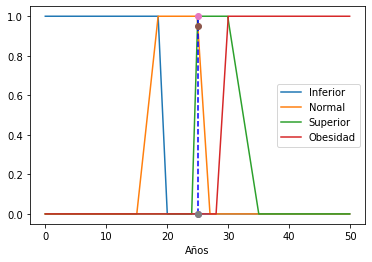

In [8]:
val_imc = 25

val_IMCI = trapmf(val_imc,(0,0,18.5,20))
val_IMCN = trapmf(val_imc,(15,18.5,24.9,27))
val_IMCS = trapmf(val_imc,(24,25,29.9,35))
val_IMCO = trapmf(val_imc,(28,30,50,50))

x_imc = [val_IMCI,val_IMCN,val_IMCS,val_IMCO]
imc_input = {}
for i,item in enumerate(x_imc):
  imc_input[imc_labeli[i]] = item
print(imc_input)

plt.plot(imc,IMCI,label="Inferior")
plt.plot(imc,IMCN,label="Normal")
plt.plot(imc,IMCS,label="Superior")
plt.plot(imc,IMCO,label="Obesidad")
plt.plot([val_imc,val_imc],[0.0,1.0],"--b")
plt.plot(val_imc,val_IMCI,"o")
plt.plot(val_imc,val_IMCN,"o")
plt.plot(val_imc,val_IMCS,"o")
plt.plot(val_imc,val_IMCO,"o")
plt.xlabel("Años")
plt.legend(loc="best")
plt.show()

Aplicando los operados AND:
$\mu_{A}(x) = \prod_{i=1}^{n}\mu_{A^i}(x_i) $

In [9]:
and_antecedent = {}
print(f"Edad:{edad_input}\nIMC:{imc_input}")
for labele,valuet in edad_input.items():
  for labeli,valueh in imc_input.items():
    and_antecedent[(labele,labeli)] = T_probabilistico(valuet,valueh)
for i in and_antecedent:
  print(f"{i}:{and_antecedent[i]}")

Edad:{'EJ': 0.3333333333333333, 'EA': 0.25, 'EAM': 0.0}
IMC:{'IMCI': 0.0, 'IMCN': 0.9523809523809518, 'IMCS': 1.0, 'IMCO': 0.0}
('EJ', 'IMCI'):0.0
('EJ', 'IMCN'):0.3174603174603172
('EJ', 'IMCS'):0.3333333333333333
('EJ', 'IMCO'):0.0
('EA', 'IMCI'):0.0
('EA', 'IMCN'):0.23809523809523794
('EA', 'IMCS'):0.25
('EA', 'IMCO'):0.0
('EAM', 'IMCI'):0.0
('EAM', 'IMCN'):0.0
('EAM', 'IMCS'):0.0
('EAM', 'IMCO'):0.0


Aplicando el operador IF-THEN: $\mu_{B^l}(y) =\mu_{A \rightarrow B}(x,y) = \mu_{A}(x)*\mu_B(y)$ 

In [10]:
if_then = []
for antecedent in and_antecedent:
  consequent = rules_FIS1[antecedent]
  val_antecedent = and_antecedent[antecedent]
  if consequent == "B":
    if_then.append(T_probabilistico(val_antecedent,trapmf(ff,(0,0,20,30))))
  elif consequent == "M":
    if_then.append(T_probabilistico(val_antecedent,trapmf(ff,(30,40,60,70))))
  elif consequent == "A":
    if_then.append(T_probabilistico(val_antecedent,trapmf(ff,(70,80,100,100))))

Conjuntos difusos obtenidos con cada regla

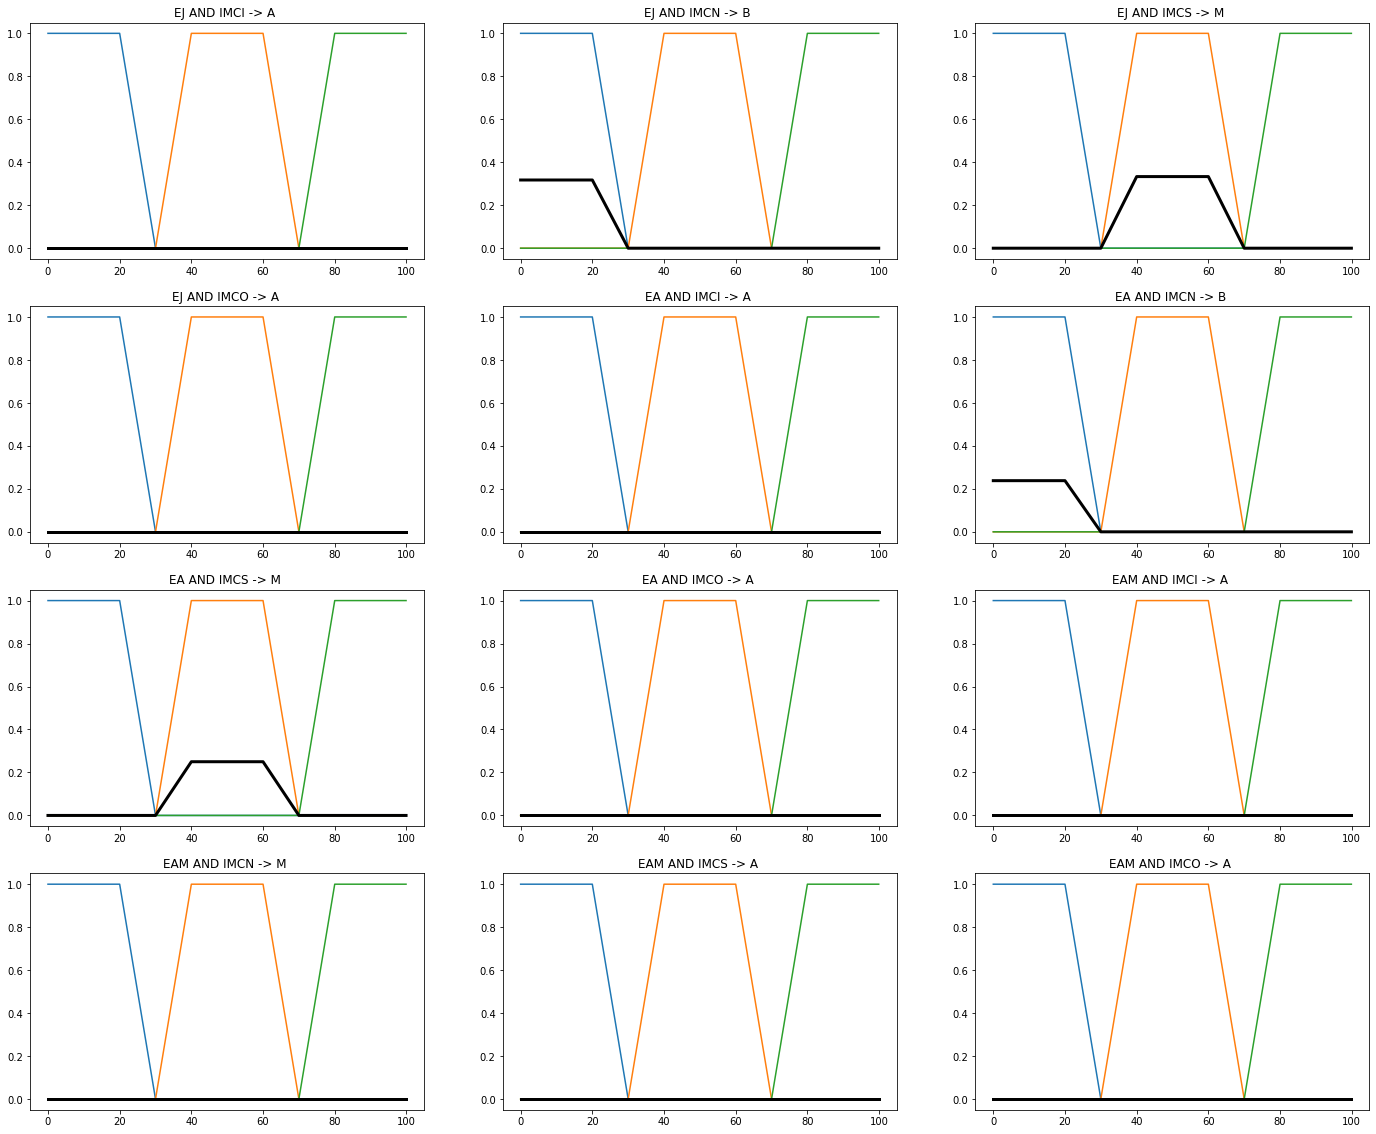

In [11]:
fig, axes = plt.subplots(4,3,figsize=(24,20))
xxx = list(rules_FIS1.items())
for i in range(0,4):
  for j in range(0,3):
    axes[i][j].plot(ff,FFB,label="Bajo")
    axes[i][j].plot(ff,FFM,label="Medio")
    axes[i][j].plot(ff,FFA,label="Alto")
    axes[i][j].plot(ff,if_then[3*i+j],linewidth=3,color="k")
    axes[i][j].set_title(f"{xxx[3*i+j][0][0]} AND {xxx[3*i+j][0][1]} -> {xxx[3*i+j][1]} ")
plt.show()

Agregando los conjuntos difusos de salida en uno solo mediante la S-norma

In [12]:
consequent = S_probabilistico(*if_then)

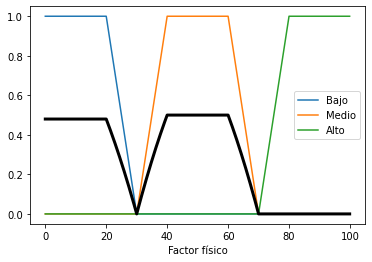

In [13]:
plt.plot(ff,FFB,label="Bajo")
plt.plot(ff,FFM,label="Medio")
plt.plot(ff,FFA,label="Alto")
plt.plot(ff,consequent,linewidth=3,color="k")
plt.xlabel("Factor físico")
plt.legend(loc="best")
plt.show()

Defuzzificación mediante el método del centroide
$\frac{\sum_{y{\in}V}y\mu_{B'}(y)}{\sum_{y{\in}V}\mu_{B'}(y)}$

In [14]:
out_centroid = defuzz(ff,consequent,"centroid")
val_FF = out_centroid
print(out_centroid)

33.50813729090488


# SEGUNDO SISTEMA DIFUSO FACTOR ENTORNO

------------***Definición de las variables de entrada***------------

**Criticidad (sin definición)**

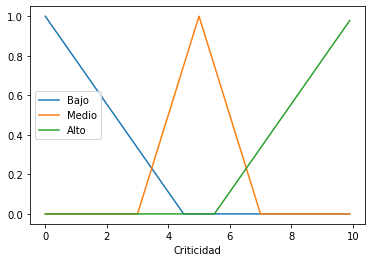

In [18]:
cr = np.arange(0,10,0.1)
criticidad_labelcr = ["CRB","CRM","CRA"]
CRB = trimf(cr,(0,0,4.5))
CRM = trimf(cr,(3,5,7))
CRA = trimf(cr,(5.5,10,10))
plt.plot(cr,CRB,label="Bajo")
plt.plot(cr,CRM,label="Medio")
plt.plot(cr,CRA,label="Alto")
plt.xlabel("Criticidad")
plt.legend(loc="best")
plt.show()

**Contactos confirmados**

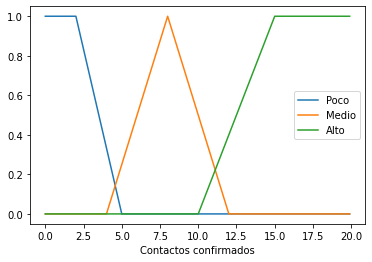

In [15]:
cc = np.arange(0,20,0.1)
contacto_labelcc = ["CCP","CCM","CCA"]
CCP = trapmf(cc,(0,0,2,5))
CCM = trimf(cc,(4,8,12))
CCA = trapmf(cc,(10,15,20,20))

plt.plot(cc,CCP,label="Poco")
plt.plot(cc,CCM,label="Medio")
plt.plot(cc,CCA,label="Alto")
plt.xlabel("Contactos confirmados")
plt.legend(loc="best")
plt.show()

------------***Definición de la variable de salida***------------

**Factor entorno**

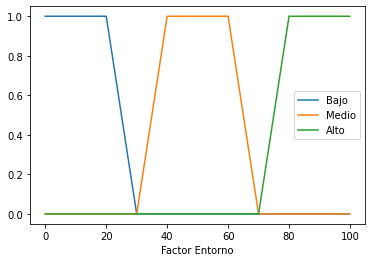

In [20]:
fe = np.arange(0,100,0.1)

FEB = trapmf(fe,(0,0,20,30))
FEM = trapmf(fe,(30,40,60,70))
FEA = trapmf(fe,(70,80,100,100))

plt.plot(fe,FEB,label="Bajo")
plt.plot(fe,FEM,label="Medio")
plt.plot(fe,FEA,label="Alto")
plt.xlabel("Factor Entorno")
plt.legend(loc="best")
plt.show()

------------***Definición de reglas***------------

In [21]:
rules_FIS2 = {
    ("CRB","CCP"):"B",
    ("CRB","CCM"):"M",
    ("CRB","CCA"):"M",
    ("CRM","CCP"):"B",
    ("CRM","CCM"):"M",
    ("CRM","CCA"):"A",
    ("CRA","CCP"):"M",
    ("CRA","CCM"):"A",
    ("CRA","CCA"):"A",
}

------------***Fuzzificación***------------